In [1]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Encoding
from sklearn.preprocessing import LabelEncoder

#ML Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Artificial Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel(open('Healthcare_dataset.xlsx', 'rb'),sheet_name='Dataset') 

In [4]:
data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [5]:
# Created a function to get necessary information from the data set in a dataframe
def get_data_info():
    dataset_info = pd.DataFrame(index=data.columns)
    dataset_info['Data_type'] = data.dtypes
    dataset_info['Total Value'] = data.count()
    dataset_info['Null_count'] = data.isnull().sum()
    dataset_info['Unique_count'] = data.nunique()
    pd.set_option('display.max_rows', None)
    return dataset_info

In [6]:
get_data_info()

,Data_type,Total Value,Null_count,Unique_count
Ptid,object,3424,0,3424
Persistency_Flag,object,3424,0,2
Gender,object,3424,0,2
Race,object,3424,0,4
Ethnicity,object,3424,0,3
Region,object,3424,0,5
Age_Bucket,object,3424,0,4
Ntm_Speciality,object,3424,0,36
Ntm_Specialist_Flag,object,3424,0,2
Ntm_Speciality_Bucket,object,3424,0,3


In [7]:
data.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [8]:
data.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [9]:
#EDA 

In [10]:
Visualization_Cols = ['Persistency_Flag','Gender','Race','Ethnicity','Region',
                      'Age_Bucket','Tscore_Bucket_Prior_Ntm','Adherent_Flag',
                      'Injectable_Experience_During_Rx','Count_Of_Risks'
                     ]

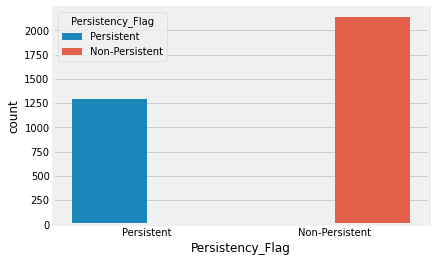

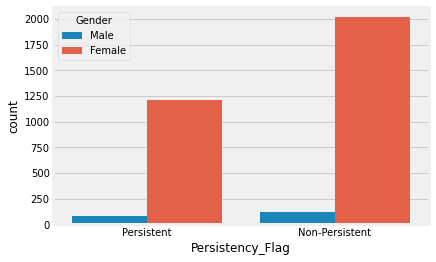

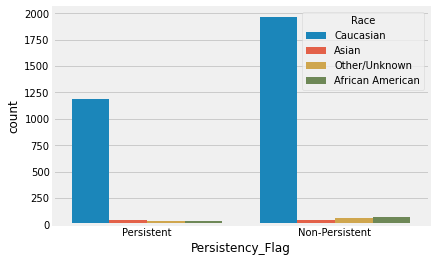

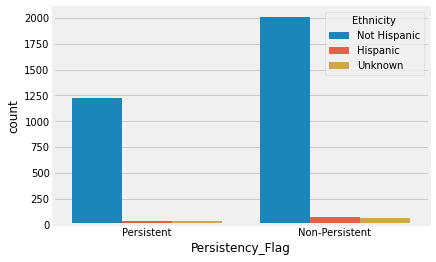

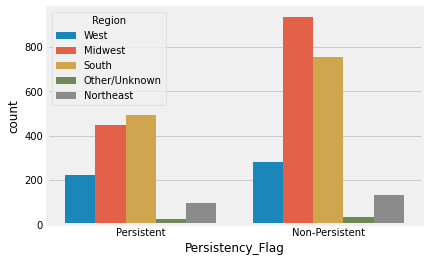

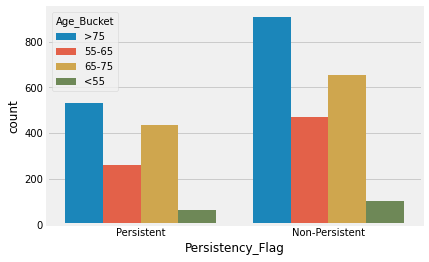

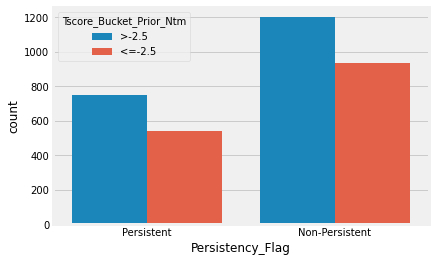

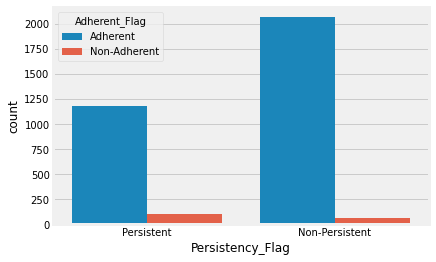

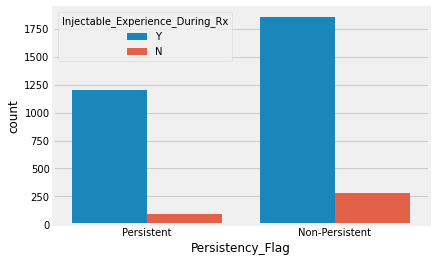

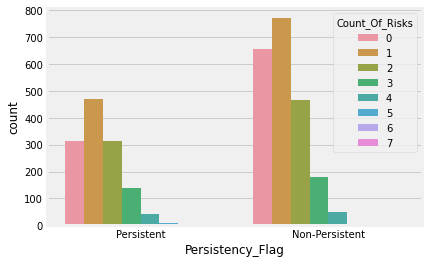

In [11]:
plt.style.use('fivethirtyeight')
for col in Visualization_Cols:
    sns.countplot(x='Persistency_Flag', data = data, hue = col)
    plt.show()

In [12]:
# Select Dependent and Independent Variables

In [13]:
#Drop the dependent variable 'Persistency_Flag', then drop 'Ptid' we do not need the column'
X = data.drop(columns=['Ptid','Persistency_Flag'])

In [14]:
X.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
1,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,N,N,N,N,N,N,N,N,0
2,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,...,N,Y,N,N,N,N,N,N,N,2
3,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,...,N,N,N,N,N,N,N,N,N,1
4,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,...,N,N,N,N,N,N,N,N,N,1


In [15]:
# Select our Dependent variable 'Persistency_Flag'
y = data.Persistency_Flag

In [16]:
y[:5]

0        Persistent
1    Non-Persistent
2    Non-Persistent
3    Non-Persistent
4    Non-Persistent
Name: Persistency_Flag, dtype: object

In [17]:
# Now that we have selected our dependent and independent variable,
# It is important to note that we need to encode our columns as computer only works well with numerical data
# Since we already have a dataset with 60 columns, using pandas One-Hot_Encoding wouldn't be smart. 
# Hence, we use the LabelEncoder library. 

In [18]:
#Create an object of the Label Encoder library
Le = LabelEncoder()

In [19]:
# Encode our target column
y = Le.fit_transform(y)

In [20]:
y[:5]

array([1, 0, 0, 0, 0])

In [21]:
#Get the columns that are numeric
X.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [22]:
#Columns to Encode
CTE = ['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag', 
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx', 'Dexa_During_Rx', 
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm',
       'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx', 
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms', 'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx', 'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified', 
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx', 'Comorb_Long_Term_Current_Drug_Therapy',
       'Comorb_Dorsalgia', 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture', 'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease', 'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain', 'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins', 'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General', 'Concom_Viral_Vaccines',
       'Risk_Type_1_Insulin_Dependent_Diabetes', 'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism',
       'Risk_Untreated_Early_Menopause', 'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption', 'Risk_Chronic_Liver_Disease',
       'Risk_Family_History_Of_Osteoporosis', 'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy',
       'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls']

In [23]:
# Encode the other cartegorical variables
for col in CTE:
    X[col] = Le.fit_transform(X[col])

In [24]:
X.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,1,2,1,4,3,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,4,0,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,1,5,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,2,1,0,3,5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,2,1,0,3,5,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [25]:
#We have successfully encoded our data. 
# Now we split our data into training and testing set

In [73]:
#Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [74]:
# Check the shape of our data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2396, 67), (1028, 67), (2396,), (1028,))

In [28]:
#There is an imbalance in the dataset. 
#We use SMOTE to settle the imbalance in the dataset

In [29]:
# Create an object of our SMOTE library
sm = SMOTE(random_state=2)

In [30]:
# Performing oversampling on our train set
X_train,y_train = sm.fit_resample(X_train,y_train)

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    1. Logistic Regression </h2>

In [31]:
Lr_model = LogisticRegression(max_iter=5000,solver='newton-cg')
Lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=5000, solver='newton-cg')

In [32]:
Lr_score = Lr_model.score(X_test,y_test) * 100 

In [33]:
print(f'Accuracy Score using Logistic Regression = {Lr_score:.2f}%')

Accuracy Score using Logistic Regression = 77.82%


In [34]:
Lr_pred = Lr_model.predict(X_test)

In [35]:
print(classification_report(y_test, Lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       641
           1       0.70      0.72      0.71       387

    accuracy                           0.78      1028
   macro avg       0.76      0.77      0.77      1028
weighted avg       0.78      0.78      0.78      1028



In [36]:
Lr_auc = np.round(roc_auc_score(y_test, Lr_pred), 3)
 
print("Auc is {}". format(Lr_auc))

Auc is 0.767


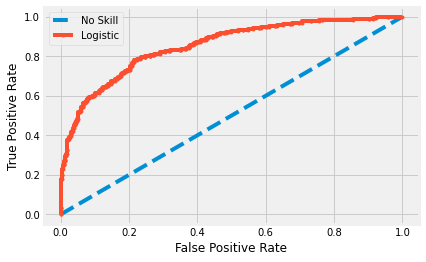

In [37]:
# predict probabilities
yhat = Lr_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(51.62, 0.5, 'True values')

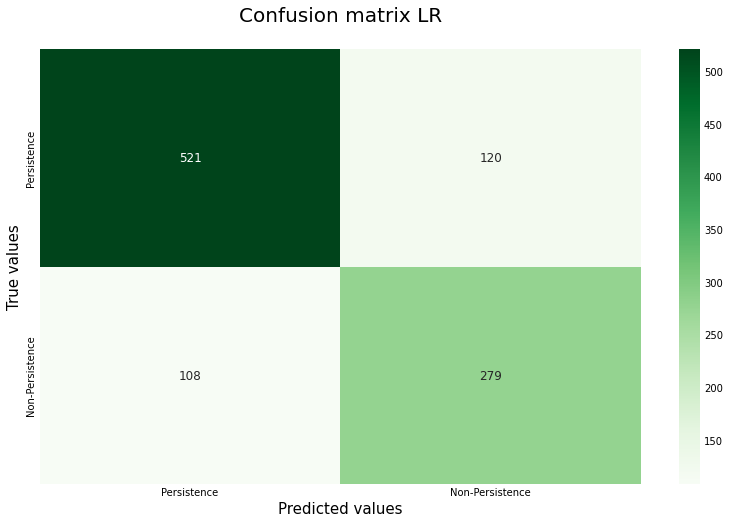

In [38]:
# confusion matrix
matrix = confusion_matrix(y_test, Lr_pred)
# Dataframe to store values
df_cm = pd.DataFrame(matrix, index = ['Persistence', 'Non-Persistence'],
                            columns = ['Persistence', 'Non-Persistence'])
plt.figure(figsize = (12,8))
#plot confusion matrix
sns.heatmap(df_cm,
            annot=True,
            cmap='Greens',
            fmt='.5g',
            annot_kws={"size": 12}).set_title('Confusion matrix LR', fontsize = 20, y=1.05)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('True values', fontsize = 15)

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    2. Support Vector Machine (SVM) </h2>

In [39]:
SVM_model = SVC(C=10,probability=True)
SVM_model.fit(X_train,y_train)

SVC(C=10, probability=True)

In [40]:
SVM_score = SVM_model.score(X_test,y_test)*100

In [41]:
print(f'Accuracy Score using Support Vector Machine (SVM) = {SVM_score:.2f}%')

Accuracy Score using Support Vector Machine (SVM) = 78.89%


In [42]:
SVM_pred = SVM_model.predict(X_test)

In [43]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       641
           1       0.73      0.69      0.71       387

    accuracy                           0.79      1028
   macro avg       0.78      0.77      0.77      1028
weighted avg       0.79      0.79      0.79      1028



In [44]:
SVM_auc = np.round(roc_auc_score(y_test, SVM_pred), 3)
 
print("Auc is {}". format(SVM_auc))

Auc is 0.77


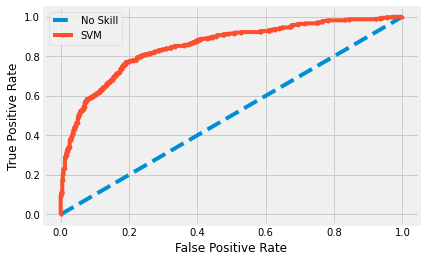

In [45]:
# predict probabilities
yhat_SVM = SVM_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat_SVM[:, 1]

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(51.62, 0.5, 'True values')

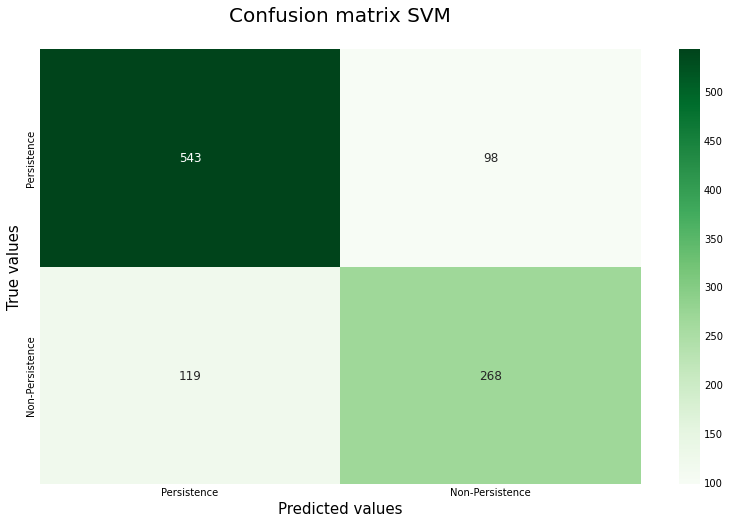

In [46]:
# confusion matrix
matrix = confusion_matrix(y_test, SVM_pred)
# Dataframe to store values
df_cm = pd.DataFrame(matrix, index = ['Persistence', 'Non-Persistence'],
                            columns = ['Persistence', 'Non-Persistence'])
plt.figure(figsize = (12,8))
#plot confusion matrix
sns.heatmap(df_cm,
            annot=True,
            cmap='Greens',
            fmt='.5g',
            annot_kws={"size": 12}).set_title('Confusion matrix SVM', fontsize = 20, y=1.05)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('True values', fontsize = 15)

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    3. KNN </h2>

In [47]:
KNN_model = KNeighborsClassifier(n_jobs=5,n_neighbors= 100)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=5, n_neighbors=100)

In [48]:
KNN_score = KNN_model.score(X_test,y_test)*100

C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
print(f'Accuracy Score using KNeighbour Neighbour = {KNN_score:.2f}%')

Accuracy Score using KNeighbour Neighbour = 77.72%


In [50]:
KNN_pred = KNN_model.predict(X_test)

C:\Users\Olutayo OLADEINBO\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       641
           1       0.78      0.56      0.66       387

    accuracy                           0.78      1028
   macro avg       0.78      0.73      0.75      1028
weighted avg       0.78      0.78      0.77      1028



In [52]:
KNN_auc = np.round(roc_auc_score(y_test, KNN_pred), 3)
 
print("Auc is {}". format(KNN_auc))

Auc is 0.735


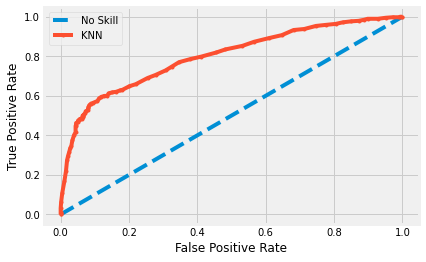

In [53]:
# predict probabilities
yhat_KNN = KNN_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat_KNN[:, 1]

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(51.62, 0.5, 'True values')

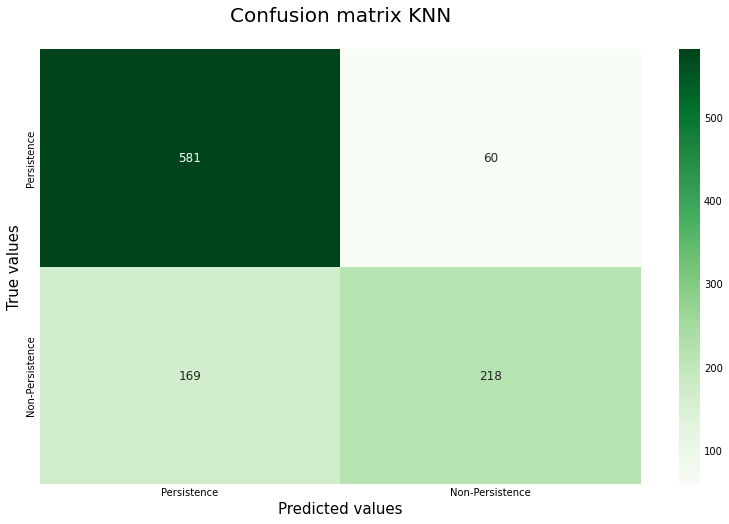

In [54]:
# confusion matrix
matrix = confusion_matrix(y_test, KNN_pred)
# Dataframe to store values
df_cm = pd.DataFrame(matrix, index = ['Persistence', 'Non-Persistence'],
                            columns = ['Persistence', 'Non-Persistence'])
plt.figure(figsize = (12,8))
#plot confusion matrix
sns.heatmap(df_cm,
            annot=True,
            cmap='Greens',
            fmt='.5g',
            annot_kws={"size": 12}).set_title('Confusion matrix KNN', fontsize = 20, y=1.05)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('True values', fontsize = 15)

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    4. Gradient Boost </h2>

In [55]:
GB_model = GradientBoostingClassifier(learning_rate=0.01,loss='exponential',max_depth=70,max_features=1,n_estimators=200)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=70,
                           max_features=1, n_estimators=200)

In [56]:
GB_score = GB_model.score(X_test,y_test)

In [57]:
print(f'Accuracy Score using Gradient Boost Classifier = {GB_score:.2f}%')

Accuracy Score using Gradient Boost Classifier = 0.80%


In [58]:
GB_pred = GB_model.predict(X_test)

In [59]:
print(classification_report(y_test, GB_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       641
           1       0.73      0.72      0.73       387

    accuracy                           0.80      1028
   macro avg       0.78      0.78      0.78      1028
weighted avg       0.80      0.80      0.80      1028



In [60]:
GB_auc = np.round(roc_auc_score(y_test, GB_pred), 3)
 
print("Auc is {}". format(GB_auc))

Auc is 0.781


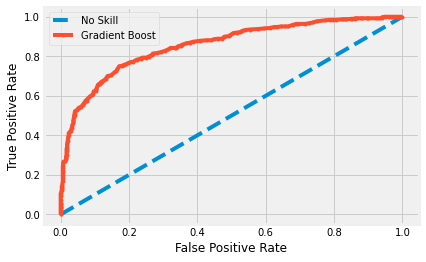

In [61]:
# predict probabilities
yhat_GB = GB_model.predict_proba(X_test)

# retrieve just the probabilities for the positive class
pos_probs = yhat_GB[:, 1]

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Gradient Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Text(51.62, 0.5, 'True values')

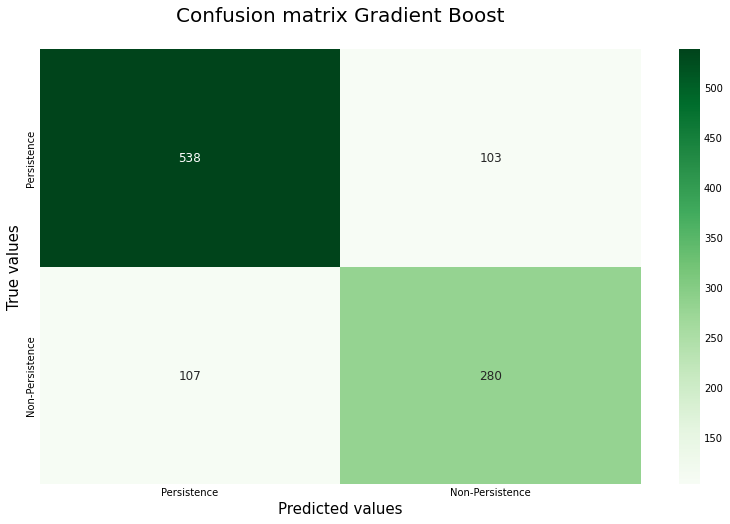

In [62]:
# confusion matrix
matrix = confusion_matrix(y_test, GB_pred)
# Dataframe to store values
df_cm = pd.DataFrame(matrix, index = ['Persistence', 'Non-Persistence'],
                            columns = ['Persistence', 'Non-Persistence'])
plt.figure(figsize = (12,8))
#plot confusion matrix
sns.heatmap(df_cm,
            annot=True,
            cmap='Greens',
            fmt='.5g',
            annot_kws={"size": 12}).set_title('Confusion matrix Gradient Boost', fontsize = 20, y=1.05)
plt.xlabel('Predicted values', fontsize = 15)
plt.ylabel('True values', fontsize = 15)

<h2 style='font-weight:bold;color:#ff0000;text-align:center'>    5. Artificial Neural Network </h2>

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2,stratify=y)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Creating a Neural Network with 1 input layer and 3 hidden layers with activation function ***RELU*** 
# Then one output layer with ***sigmoid*** function
model = keras.Sequential([
    keras.layers.Flatten(input_dim=X_train.shape[1]),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(600, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])
#Compile our model using Optimizer adam and loss function , 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Model trains for 150 epochs and validates our model on X_test and y_test. 
history = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
107/107 [==============================] - 2s 11ms/step - loss: 0.5775 - accuracy: 0.7014 - val_loss: 0.4614 - val_accuracy: 0.7781
Epoch 2/100
107/107 [==============================] - 1s 10ms/step - loss: 0.4780 - accuracy: 0.7857 - val_loss: 0.4629 - val_accuracy: 0.7883
Epoch 3/100
107/107 [==============================] - 1s 10ms/step - loss: 0.4468 - accuracy: 0.7948 - val_loss: 0.4702 - val_accuracy: 0.7825
Epoch 4/100
107/107 [==============================] - 1s 10ms/step - loss: 0.4339 - accuracy: 0.8118 - val_loss: 0.4655 - val_accuracy: 0.7839
Epoch 5/100
107/107 [==============================] - 1s 10ms/step - loss: 0.4052 - accuracy: 0.8220 - val_loss: 0.6032 - val_accuracy: 0.7752
Epoch 6/100
107/107 [==============================] - 1s 10ms/step - loss: 0.3828 - accuracy: 0.8317 - val_loss: 0.4781 - val_accuracy: 0.7912
Epoch 7/100
107/107 [==============================] - 1s 10ms/step - loss: 0.3629 - accuracy: 0.8475 - val_loss: 0.4964 - val_accuracy:

107/107 [==============================] - 1s 13ms/step - loss: 0.0883 - accuracy: 0.9719 - val_loss: 1.3870 - val_accuracy: 0.7869
Epoch 58/100
107/107 [==============================] - 1s 13ms/step - loss: 0.0951 - accuracy: 0.9693 - val_loss: 0.9518 - val_accuracy: 0.7606
Epoch 59/100
107/107 [==============================] - 1s 13ms/step - loss: 0.0884 - accuracy: 0.9710 - val_loss: 1.2334 - val_accuracy: 0.7825
Epoch 60/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0811 - accuracy: 0.9696 - val_loss: 1.0700 - val_accuracy: 0.7737
Epoch 61/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0671 - accuracy: 0.9745 - val_loss: 1.9404 - val_accuracy: 0.7810
Epoch 62/100
107/107 [==============================] - 2s 18ms/step - loss: 0.0684 - accuracy: 0.9737 - val_loss: 1.7206 - val_accuracy: 0.7620
Epoch 63/100
107/107 [==============================] - 2s 18ms/step - loss: 0.0811 - accuracy: 0.9734 - val_loss: 1.5118 - val_accuracy: 0.765

In [95]:
ANN_predicted = model.predict(X_test)
ANN_predicted

22/22 [==============================] - 0s 4ms/step


array([[0.84802455, 0.5683989 ],
       [0.99999994, 0.9980664 ],
       [0.17917539, 0.99999523],
       ...,
       [1.        , 0.99834156],
       [0.29717487, 0.6942169 ],
       [1.        , 0.99866885]], dtype=float32)

In [96]:
ANN_predicted_labels = [np.argmax(i) for i in ANN_predicted]
ANN_predicted_labels[:5]

[0, 0, 1, 1, 1]

In [97]:
ANN_test_labels = [np.argmax(i) for i in y_test]
ANN_test_labels[:5]

[0, 0, 0, 1, 1]

In [98]:
from sklearn.metrics import classification_report
# Print-Out our classification Report
print(classification_report(ANN_test_labels,ANN_predicted_labels))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       427
           1       0.68      0.72      0.70       258

    accuracy                           0.77       685
   macro avg       0.75      0.76      0.75       685
weighted avg       0.77      0.77      0.77       685



Text(40.1, 0.5, 'Truth')

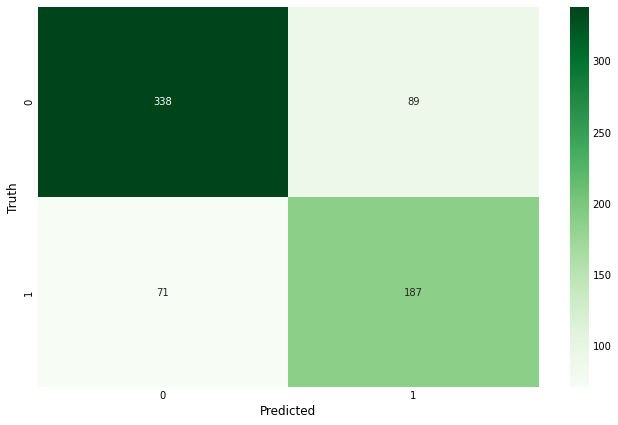

In [100]:
cm = tf.math.confusion_matrix(labels=ANN_test_labels,predictions=ANN_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

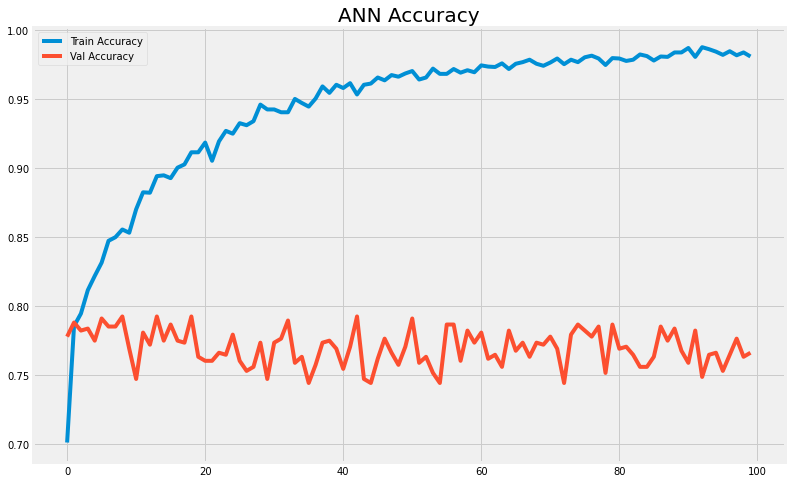

In [103]:
## Plot History
fig = plt.figure(figsize=(12, 8))
plt.title('ANN Accuracy', size=20)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.show()

SHAP

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement shap (from versions: none)
ERROR: No matching distribution found for shap


In [ ]:
import shap